**Loading the MNIST Data through Keras**

In [1]:
import keras
from keras.datasets import mnist

(train_images_original, train_labels_original), (test_images_original, test_labels_original) = mnist.load_data()


Using TensorFlow backend.


**Preparing the image data**

In [2]:
train_images = train_images_original.reshape((60000, 28 * 28))
train_images = train_images.astype('float32') / 255

test_images = test_images_original.reshape((10000, 28 * 28))
test_images = test_images.astype('float32') / 255

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


**Preparing the train labels ( coverting intergers to binary)**

In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels_original,10)
test_labels = to_categorical(test_labels_original,10)
print(train_labels.shape)
print(test_labels.shape)

(60000, 10)
(10000, 10)


**Network Architecture**

In [4]:
from keras import models
from keras import layers
import matplotlib.pyplot as plt

network = models.Sequential()
network.add(layers.Dense(64, activation='sigmoid',input_dim = 28*28))
network.add(layers.Dense(10, activation='softmax'))

sgd = keras.optimizers.SGD(lr=0.1)
network.compile(optimizer=sgd,
                loss='categorical_crossentropy',
                metrics=['accuracy'])
epochs = 30
# I tried with batch size = 128 but the results are more accurate with batch size=32
History = network.fit(train_images, 
                      train_labels, 
                      epochs=epochs, 
                      batch_size=32, 
                      validation_data=(test_images, test_labels))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 3s 58us/step - loss: 0.5594 - acc: 0.8581 - val_loss: 0.3128 - val_acc: 0.9109
Epoch 2/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.2942 - acc: 0.9163 - val_loss: 0.2573 - val_acc: 0.9276
Epoch 3/30
60000/60000 [==============================] - 3s 57us/step - loss: 0.2475 - acc: 0.9293 - val_loss: 0.2257 - val_acc: 0.9353
Epoch 4/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.2169 - acc: 0.9389 - val_loss: 0.1985 - val_acc: 0.9439
Epoch 5/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1939 - acc: 0.9452 - val_loss: 0.1802 - val_acc: 0.9485
Epoch 6/30
60000/60000 [==============================] - 3s 56us/step - loss: 0.1754 - acc: 0.9503 - val_loss: 0.1689 - val_acc: 0.9506
Epoch 7/

Test loss: 0.08329666938744486
Test accuracy: 0.9721


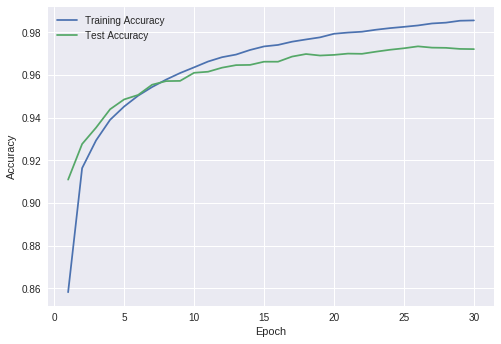

In [5]:
#evaluate function: Returns the loss value & metrics values for the model in test mode
metrics = network.evaluate(test_images, test_labels, verbose=0)
print('Test loss:', metrics[0])
print('Test accuracy:', metrics[1])

accuracyplot = plt.plot(range(1,31),History.history['acc'],range(1,31),History.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(('Training Accuracy','Test Accuracy'))
plt.show(accuracyplot)